<a href="https://colab.research.google.com/github/NatShed/-/blob/main/%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

**Датасет**: https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics

**Описание данных**:

Датасет содержит медицинские показатели разных пациентов. На основании этих данных можно спрогнозировать наличие диабета.

**Pregnancies**: Количество беременностей пациентки.

**Glucose**: Концентрация глюкозы в плазме крови через 2 часа при проведении перорального теста на толерантность к глюкозе.

**BloodPressure**: Диастолическое артериальное давление (мм рт. ст.).

**SkinThickness**: Толщина кожной пластины трицепса (мм).

**Insulin**: уровень инсулина в крови.

**BMI**: индекс массы тела (вес в кг/(рост в м)^2).

**DiabetesPedigreeFunction**: Функция, оценивающая вероятность развития диабета на основе семейного анамнеза.

**Age**: возраст пациента (годы).

**Outcome**: Результат — классовая переменная (0 или 1), где 1 означает наличие диабета, а 0 - его отсутствие.

In [2]:
'''
Читаем данные из файла, и сразу смотрим заголовки столбцов (название фич) и первые 5 строк.

'''
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Дополнительная информация о датафрейме
print(f'{data.info()}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



In [5]:
data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

df= data[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [7]:
X = df
y = data['Outcome']
vals = sorted(data['Outcome'].unique())

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Линейное сокращение размерности - метод главныйх компонентов

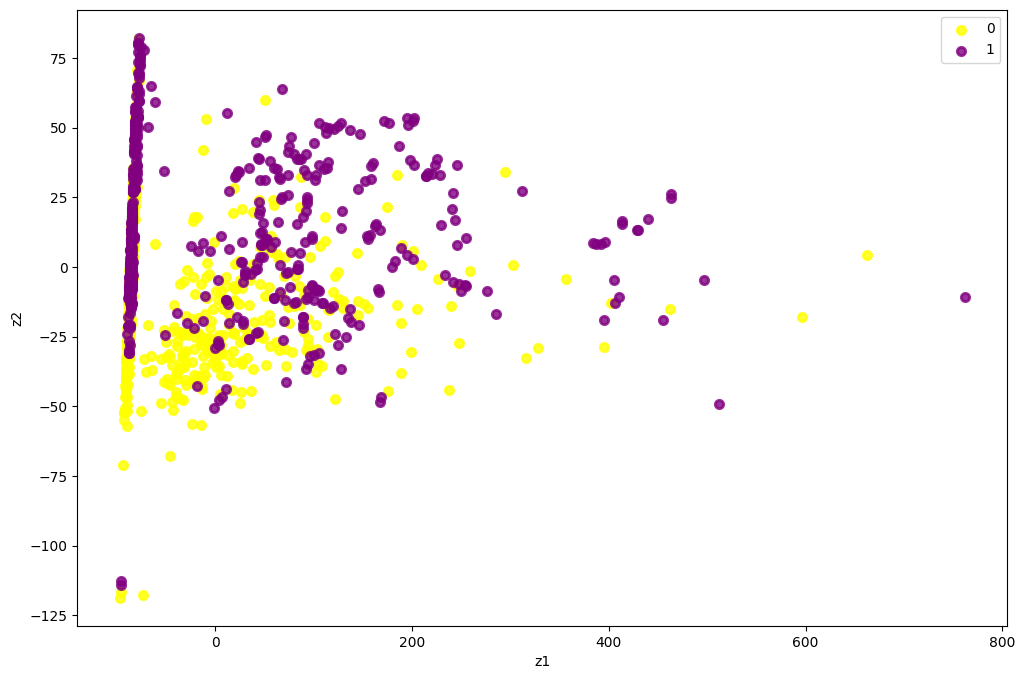

In [17]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ['yellow', 'purple']
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()


Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio. Используя наш набор данных, мы можем вызвать explained_variance_ratio следующим образом:

In [ ]:
pca.explained_variance_ratio_

array([0.89344148, 0.0584707 ])

Как вы можете видеть выше, первые главные компоненты сохраняют почти 90% дисперсии набора данных, тогда как вторые главные компоненты сохраняют только 5% дисперсии. Это указывает на то, что мы, скорее всего, получим хороший результат, если еще больше уменьшим размерность до 1D.

Независисый анализ компонентов

In [19]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

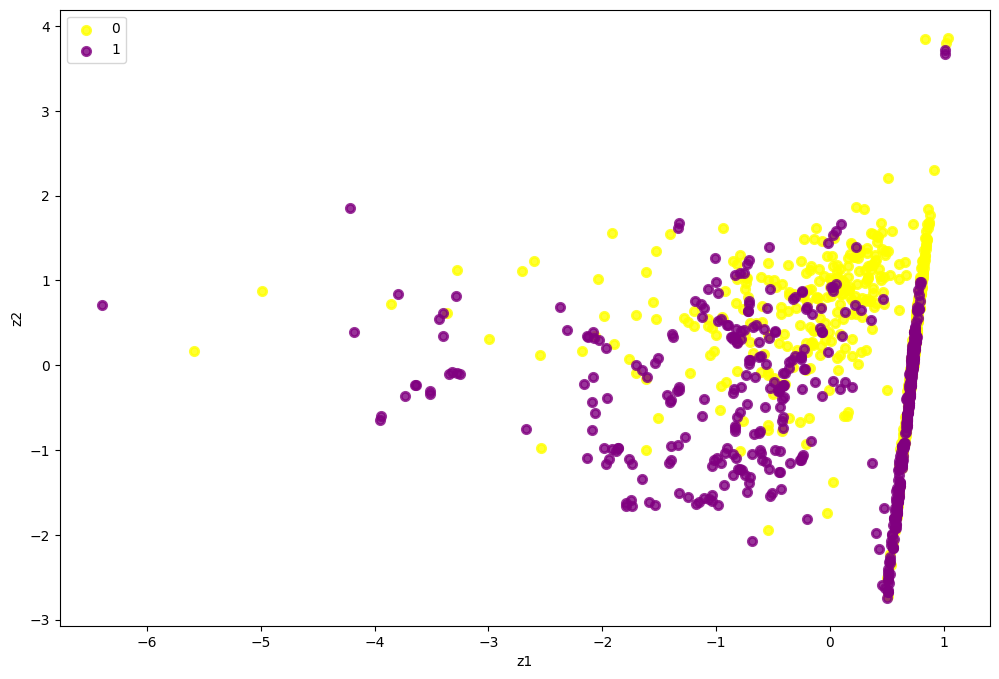

In [20]:
plt.figure(figsize=(12,8))
colors = ['yellow', 'purple']
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [23]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

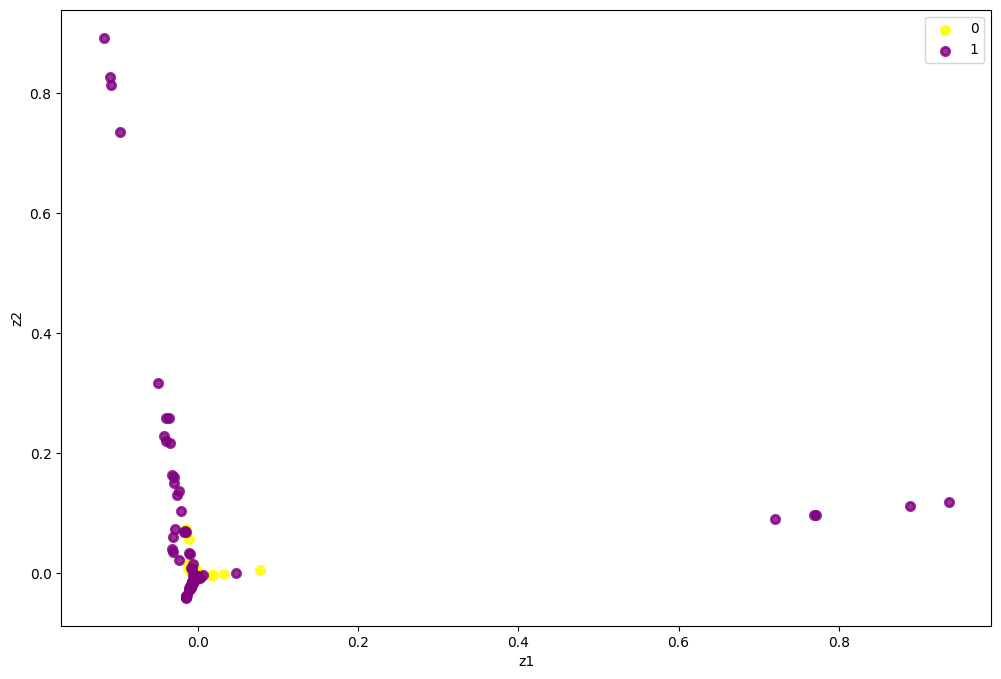

In [24]:
plt.figure(figsize=(12,8))
colors = ['yellow', 'purple']
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

t-распределенное стохастическое вложение соседей (t-distributed Stochastic Neighbor Embedding, tSNE) : Вычисляет вероятность того, что пары точек данных в пространстве высокой размерности связаны, а затем выбирает вложение низкой размерности, которое дает аналогичное распределение.


t-SNE - метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.

вложение — многомерные данные, представленные в пространстве меньшей размерности; сосед — точка данных, расположенная близко к интересующей нас точке данных; стохастический — случайно используемый в итерационном процессе при поиске репрезентативного вложения; t-распределение — распределение вероятности, используемое алгоритмом для вычисления оценок сходства в низкоразмерном вложении.


##### Этап 1
t-SNE начинается с определения сходства точек на основе расстояний между ними. Близлежащие точки считаются похожими, в то время как удаленные считаются непохожими.

Для этого измеряются расстояния между интересующей точкой и другими точками, после чего они помещаются на нормальную кривую. Такие измерения проделываются для каждой точки с применением некоторого масштабирования для учета различий в плотности различных секций.

Например, на приведенной ниже иллюстрации мы наблюдаем более высокую плотность в секции, занятой синими точками, и более низкую плотность в секции, занятой желтыми точками.

Результатом этих вычислений является матрица, содержащая оценки сходства между каждой парой точек из исходного многомерного пространства.

Далее переходим к t-SNE, который рандомно отображает все точки в более низкоразмерном пространстве и вычисляет сходство между ними, как описано выше. Правда, с одним отличием: на этот раз алгоритм использует t-распределение вместо нормального распределения.

##### Этап 3
Теперь цель алгоритма состоит в том, чтобы создать новую матрицу сходства, похожую на исходную, используя итерационный подход. С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдаленных.

Новая матрица сходства постепенно начинает больше походить на исходную. Процесс продолжается до тех пор, пока не будет достигнуто максимальное количество итераций или предельное улучшение.

Описание этого процесса в сугубо научных терминах выглядит так: алгоритм минимизирует расхождение Кульбака–Лейблера (расхождение KL) посредством градиентного спуска.

##### Перплексия
Перплексия - гиперпараметр, который описывает ожидаемую плотность вокруг каждой точки или, другими словами, устанавливает соотношение целевого количества ближайших соседей к интересующей точке.

Параметр перплексии играет важнейшую роль в определении конечного результата вложения. Как правило, можно выбрать значение перплексии где-то между 5 и 50, но при этом обязательно следует поэкспериментировать с другими значениями.

Низкое значение заставляет алгоритм фокусироваться на меньшем количестве соседей, что приводит ко множеству небольших групп. Напротив, высокое значение перплексии расширяет горизонт соседства, что приводит к уменьшению числа более плотно упакованных групп.

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [29]:
# Вывод результатов
print('Initial Shape of X: ', X.shape) # матрица норм распределения
print('New Shape of X: ', X_new.shape) # новая матрица сходства из т расп
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_) # расхождение Кульбака–Лейблера
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (1000, 8)
New Shape of X:  (1000, 2)
Kullback-Leibler divergence after optimization:  0.5025859475135803
No. of iterations:  999


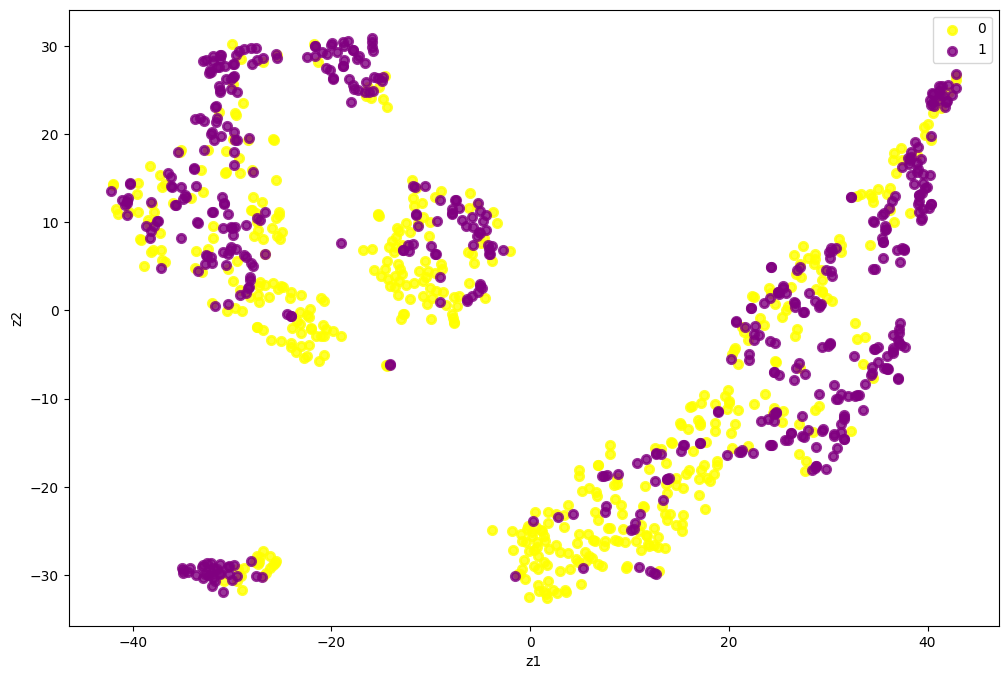

In [30]:
plt.figure(figsize=(12,8))
colors = ['yellow', 'purple']
lw = 2

for color, i, target_name in zip(colors, [0, 1], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

поиск выбросов

## Терминология

1. Эпсилонная стоимость (eps)
  Эпсилон – это радиус окружности вокруг точки данных, так что все остальные точки данных, попадающие внутрь окружности, считаются точками окрестности. Другими словами, две точки считаются соседями, если расстояние между ними меньше или равно eps.

  Если значение eps крайне мало, то большинство точек могут не лежать в окрестности и будут рассматриваться как выбросы. Это приведет к плохой кластеризации, так как большинство точек не удовлетворяют минимальному «нет». точек, необходимых для создания плотной области.

  С другой стороны, если выбрано чрезвычайно высокое значение, то большинство точек данных останутся в том же кластере. Это снова приведет к неправильной кластеризации, при которой несколько кластеров могут в конечном итоге объединиться из-за высокого значения эпсилона.

  В идеале мы должны выбирать значение eps на основе расстояния до набора данных (используя график k-расстояния), однако обычно предпочтение отдается небольшим значениям eps.

2. Минимальное количество точек
  В DBSCAN minPts - это минимальное количество точек данных, которое должно быть в регионе для определения кластера. Вы можете выбрать значение minPts в зависимости от ваших знаний в предметной области. Но если вам не хватает знаний в предметной области, хорошей точкой отсчета будет иметь minPts ≥ D + 1, где D — размерность набора данных.

  Рекомендуется оставлять значение minPts не менее 3, но для больших наборов данных следует выбирать большее значение minPts, особенно если у него много выбросов.

3.  Типы точек в кластеризации DBSCAN
  Исходя из двух вышеуказанных параметров, точку можно классифицировать как:

  **Core point** Центральная точка — это точка, в которой по крайней мере минимальное количество точек (включая саму точку) в окружающей ее области в радиусе eps.

  **Border point** Пограничная точка – это точка, в которой можно добраться из центральной точки, и в пределах окружающего ее региона насчитывается менее минимального количества точек.

  **Outlier** Выброс не является ключевой точкой и не может быть достигнут из каких-либо основных точек.
  

In [33]:
dbscan_cluster1 = DBSCAN(eps = 50, min_samples =10)
X_new = dbscan_cluster1.fit(X)

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 14
v_measure = 0.008026274642380786


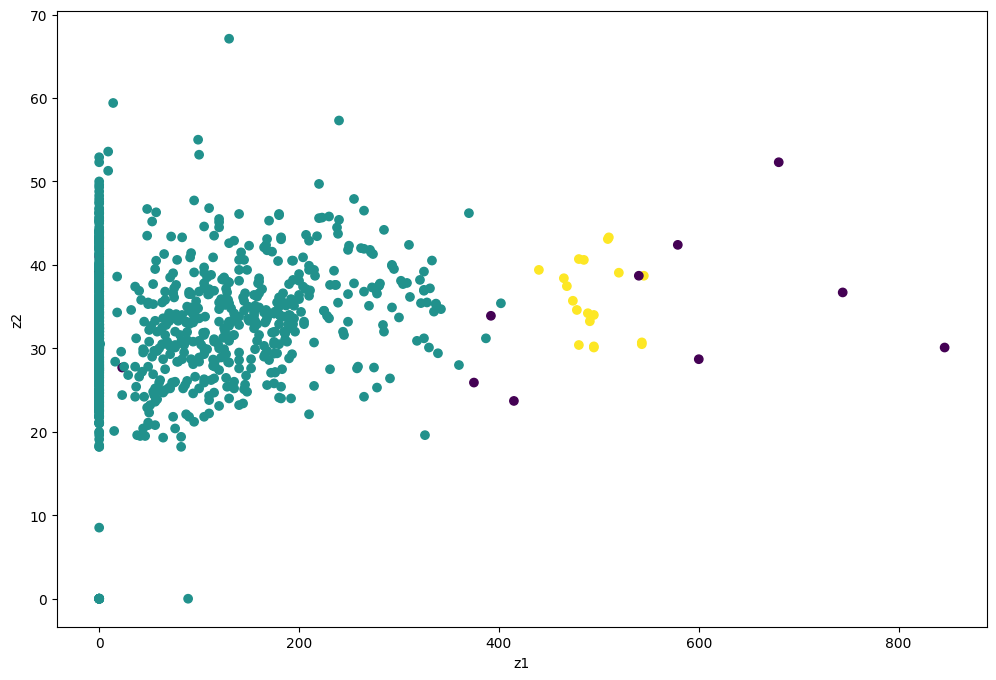

In [40]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X[cols_for_clusters[4]], X[cols_for_clusters[5]], c=dbscan_cluster1.labels_
    )

plt.xlabel("z1")
plt.ylabel("z2")

plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [41]:
from sklearn.neighbors import NearestNeighbors

min_samples = 57

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [42]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

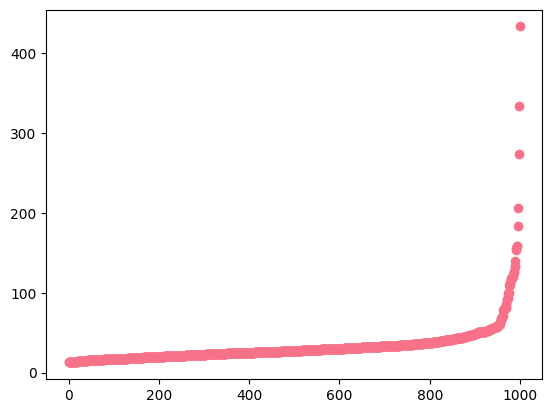

In [43]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [44]:
# Видим, что оптимальное значение eps примерно 45
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

dbscan = DBSCAN(eps = 45, min_samples = 32)
pred = dbscan.fit_predict(X)

# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 75
v_measure = 0.01459129351871298


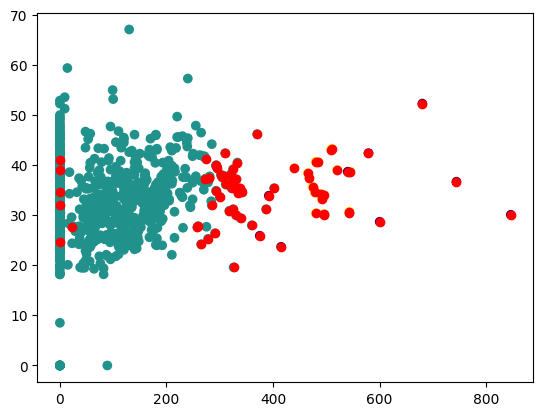

In [45]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

plt.scatter( X.iloc[:, 4], X.iloc[:, 5],c=dbscan_cluster1.labels_)
plt.scatter(values.iloc[:, 4], values.iloc[:, 5], color='r')
plt.show()